In [1]:
from model.model_initialization import * 
initialize_model(1000, 10, 0.01, 0.02)

{'cfmm_type': '',
 'initial_values': {'token_list': ['R1', 'R2'],
  'R': [1000, 1500000],
  'P': [2, 0.6666666666666666],
  'fee_assets': 0.01,
  'fee_HDX': 0.02},
 'agent_d': {'Trader': {'HDX': 1000000, 'R1': 1000000, 'R2': 1000000},
  'LP1': {'omniR1': 10}},
 'action_ls': [('trade', 1000)],
 'prob_dict': {'trade': {'sell_r2_for_r1': 0.5, 'sell_r1_for_r2': 0.5}},
 'action_dict': {'sell_r2_for_r1': {'token_buy': 'R1',
   'token_sell': 'R2',
   'amount_sell': 10,
   'action_id': 'Trade',
   'agent_id': 'Trader'},
  'sell_r1_for_r2': {'token_sell': 'R1',
   'token_buy': 'R2',
   'amount_sell': 10,
   'action_id': 'Trade',
   'agent_id': 'Trader'}}}

In [2]:
import pandas as pd

from IPython.core.debugger import Pdb
ipdb = Pdb()

from model import init_utils
from model import processing
# Experiments
from model import run
from model.plot_utils import *
from model.model_initialization import * 

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# set variables & parameters

fee_level_assets = 0.03
fee_level_hdx = 0.00
# uniform_data = np.random.rand(10, 12)
#trade_volume = {'10': 0.5, '20': 0.6}
#liquidity = {'1000': 0.5, '2000': 0.6}
#trade_volume = (50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000)
#liquidity = (100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000)
trade_volume = (50, 100)
liquidity = (100000, 200000)

#create matrix for comparison
m=len(trade_volume)
n=len(liquidity)
matrix = np.ndarray(shape = (m,n), dtype = int)

# index matrix
#better_index = ["X1", "X2", "Y1", "Y2", "Y3"]
#matrix.index = better_index


for i in range(len(liquidity)):
    for j in range(len(trade_volume)):
        # initialize model with starting conditions
        config_params = initialize_model(liquidity[i], trade_volume[j], fee_level_assets, fee_level_hdx)
        
        #run model
        config_dict, state = init_utils.get_configuration(config_params)

        pd.options.mode.chained_assignment = None  # default='warn'
        pd.options.display.float_format = '{:.2f}'.format
        
        run.config(config_dict, state)
        events = run.run()
        
        rdf, agent_df = processing.postprocessing(events)
        
        
        # fill in matrix with calculation results at specific place
        #matrix[j][i] = np.random.randint(1, 100 + 1)
        matrix[j][i] = trade_volume[i]*liquidity[j]





#print(agent_df.tail(20))




                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1000, 3, 1, 3)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.39s

                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 2
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1000, 3, 1, 3)
Execution Method: local_simulations
SimIDs   : [0, 1]
SubsetIDs: [0, 0]
Ns       : [0, 0]
ExpIDs   : [0, 0]
Execution Mode: parallelized
Total execution time: 0.83s



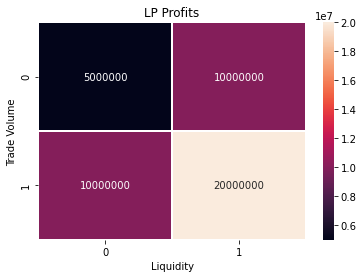

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix, linewidth=0.5, annot=True, fmt="d")
ax.set_title("LP Profits")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Liquidity')
ax.set_ylabel('Trade Volume')
plt.show()


var_list = ['R', 'Q', 'A', 'D']
plot_vars(rdf, var_list)

## Fee Analysis

In [4]:
rdf

,R-0,R-1,Q-0,Q-1,S-0,S-1,A-0,A-1,B-0,B-1,...,token_list-0,token_list-1,fee_assets,fee_HDX,n,simulation,subset,run,substep,timestep
3,100050.00,1499850.09,199900.05,1000099.95,100000,1500000,0.00,4.50,99950,1500000,...,R1,R2,0.03,0.00,2,0,0,1,3,1
6,100033.32,1499900.09,199933.39,1000066.61,100000,1500000,0.50,4.50,99950,1500000,...,R1,R2,0.03,0.00,2,0,0,1,3,2
9,100016.64,1499950.09,199966.73,1000033.27,100000,1500000,1.00,4.50,99950,1500000,...,R1,R2,0.03,0.00,2,0,0,1,3,3
12,99999.97,1500000.09,200000.06,999999.94,100000,1500000,1.50,4.50,99950,1500000,...,R1,R2,0.03,0.00,2,0,0,1,3,4
15,100049.97,1499850.18,199900.11,1000099.89,100000,1500000,1.50,8.99,99950,1500000,...,R1,R2,0.03,0.00,2,0,0,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11991,232150.44,1421267.64,344604.13,1055395.87,200000,1500000,589.19,3795.97,199900,1500000,...,R1,R2,0.03,0.00,2,3,0,1,3,996
11994,232100.43,1421367.64,344678.38,1055321.62,200000,1500000,590.69,3795.97,199900,1500000,...,R1,R2,0.03,0.00,2,3,0,1,3,997
11997,232050.45,1421467.64,344752.62,1055247.38,200000,1500000,592.19,3795.97,199900,1500000,...,R1,R2,0.03,0.00,2,3,0,1,3,998
12000,232150.45,1421267.63,344604.12,1055395.88,200000,1500000,592.19,3801.97,199900,1500000,...,R1,R2,0.03,0.00,2,3,0,1,3,999


In [5]:
print(rdf.columns)

Index(['R-0', 'R-1', 'Q-0', 'Q-1', 'S-0', 'S-1', 'A-0', 'A-1', 'B-0', 'B-1',
       'D', 'T', 'H', 'token_list-0', 'token_list-1', 'fee_assets', 'fee_HDX',
       'n', 'simulation', 'subset', 'run', 'substep', 'timestep'],
      dtype='object')


In [6]:
print(rdf.keys)

<bound method NDFrame.keys of             R-0        R-1       Q-0        Q-1     S-0      S-1    A-0  \
3     100050.00 1499850.09 199900.05 1000099.95  100000  1500000   0.00   
6     100033.32 1499900.09 199933.39 1000066.61  100000  1500000   0.50   
9     100016.64 1499950.09 199966.73 1000033.27  100000  1500000   1.00   
12     99999.97 1500000.09 200000.06  999999.94  100000  1500000   1.50   
15    100049.97 1499850.18 199900.11 1000099.89  100000  1500000   1.50   
...         ...        ...       ...        ...     ...      ...    ...   
11991 232150.44 1421267.64 344604.13 1055395.87  200000  1500000 589.19   
11994 232100.43 1421367.64 344678.38 1055321.62  200000  1500000 590.69   
11997 232050.45 1421467.64 344752.62 1055247.38  200000  1500000 592.19   
12000 232150.45 1421267.63 344604.12 1055395.88  200000  1500000 592.19   
12003 232250.45 1421067.84 344455.74 1055544.26  200000  1500000 592.19   

          A-1     B-0      B-1  ...  token_list-0 token_list-1 fee_as

In [7]:
agent_df

,simulation,subset,run,substep,timestep,agent_label,q,s-0,s-1,r-0,r-1,p-0,p-1
6,0,0,1,3,1,Trader,1000000.00,0,0,999950.00,1000145.41,0.00,0
7,0,0,1,3,1,LP1,0.00,50,0,0.00,0.00,2.00,0
12,0,0,1,3,2,Trader,1000000.00,0,0,999966.18,1000095.41,0.00,0
13,0,0,1,3,2,LP1,0.00,50,0,0.00,0.00,2.00,0
18,0,0,1,3,3,Trader,1000000.00,0,0,999982.36,1000045.41,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,3,0,1,3,998,LP1,0.00,100,0,0.30,0.00,2.00,0
24000,3,0,1,3,999,Trader,1000000.00,0,0,967257.07,1074930.40,0.00,0
24001,3,0,1,3,999,LP1,0.00,100,0,0.30,0.00,2.00,0
24006,3,0,1,3,1000,Trader,1000000.00,0,0,967157.07,1075124.19,0.00,0


In [8]:
agent_df.query('agent_label=="LP1"')

,simulation,subset,run,substep,timestep,agent_label,q,s-0,s-1,r-0,r-1,p-0,p-1
7,0,0,1,3,1,LP1,0.00,50,0,0.00,0.00,2.00,0
13,0,0,1,3,2,LP1,0.00,50,0,0.00,0.00,2.00,0
19,0,0,1,3,3,LP1,0.00,50,0,0.00,0.00,2.00,0
25,0,0,1,3,4,LP1,0.00,50,0,0.00,0.00,2.00,0
31,0,0,1,3,5,LP1,0.00,50,0,0.00,0.00,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23983,3,0,1,3,996,LP1,0.00,100,0,0.29,0.00,2.00,0
23989,3,0,1,3,997,LP1,0.00,100,0,0.30,0.00,2.00,0
23995,3,0,1,3,998,LP1,0.00,100,0,0.30,0.00,2.00,0
24001,3,0,1,3,999,LP1,0.00,100,0,0.30,0.00,2.00,0


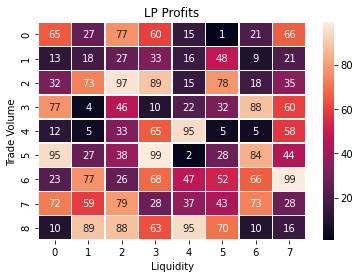

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# set variables & parameters

fee_level = 0.03
# uniform_data = np.random.rand(10, 12)
#trade_volume = {'10': 0.5, '20': 0.6}
#liquidity = {'1000': 0.5, '2000': 0.6}
trade_volume = (50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000)
liquidity = (100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000)

#create matrix for comparison
m=len(trade_volume)
n=len(liquidity)
matrix = np.ndarray(shape = (m,n), dtype = int)

# index matrix
#better_index = ["X1", "X2", "Y1", "Y2", "Y3"]
#matrix.index = better_index

# fill in matrix with calculation results
for i in range(len(liquidity)):
    for j in range(len(trade_volume)):
        matrix[j][i] = np.random.randint(1, 100 + 1)




#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix, linewidth=0.5, annot=True, fmt="d")
ax.set_title("LP Profits")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Liquidity')
ax.set_ylabel('Trade Volume')
plt.show()

In [10]:
matrix

array([[65, 27, 77, 60, 15,  1, 21, 66],
       [13, 18, 27, 33, 16, 48,  9, 21],
       [32, 73, 97, 89, 15, 78, 18, 35],
       [77,  4, 46, 10, 22, 32, 88, 60],
       [12,  5, 33, 65, 95,  5,  5, 58],
       [95, 27, 38, 99,  2, 28, 84, 44],
       [23, 77, 26, 68, 47, 52, 66, 99],
       [72, 59, 79, 28, 37, 43, 73, 28],
       [10, 89, 88, 63, 95, 70, 10, 16]])

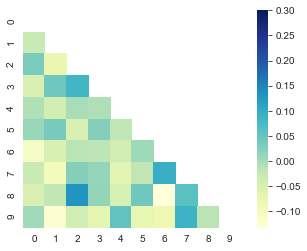

In [11]:
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,  cmap="YlGnBu")
    plt.show()

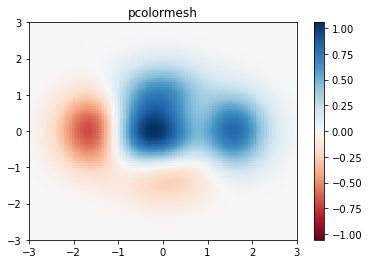

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

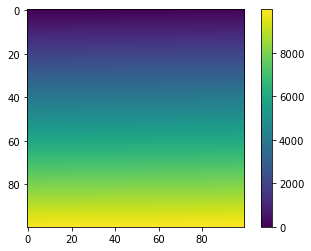

In [13]:
import matplotlib.pyplot as plt
import numpy as np


def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis')
    plt.colorbar()
    plt.show()


test_array = np.arange(100 * 100).reshape(100, 100)
heatmap2d(test_array)

In [14]:
trade_volume

(50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000)